In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('/content/force2020_data.csv')

In [11]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [13]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [14]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [15]:
for cols in df.columns:
    print(f"{cols} : \n {df[cols].nunique()} \n") #number of unique vales in each col

RHOB : 
 18003 

GR : 
 18254 

DEPTH_MD : 
 18270 

NPHI : 
 14016 

PEF : 
 16339 

DTC : 
 18037 



Missing value handling

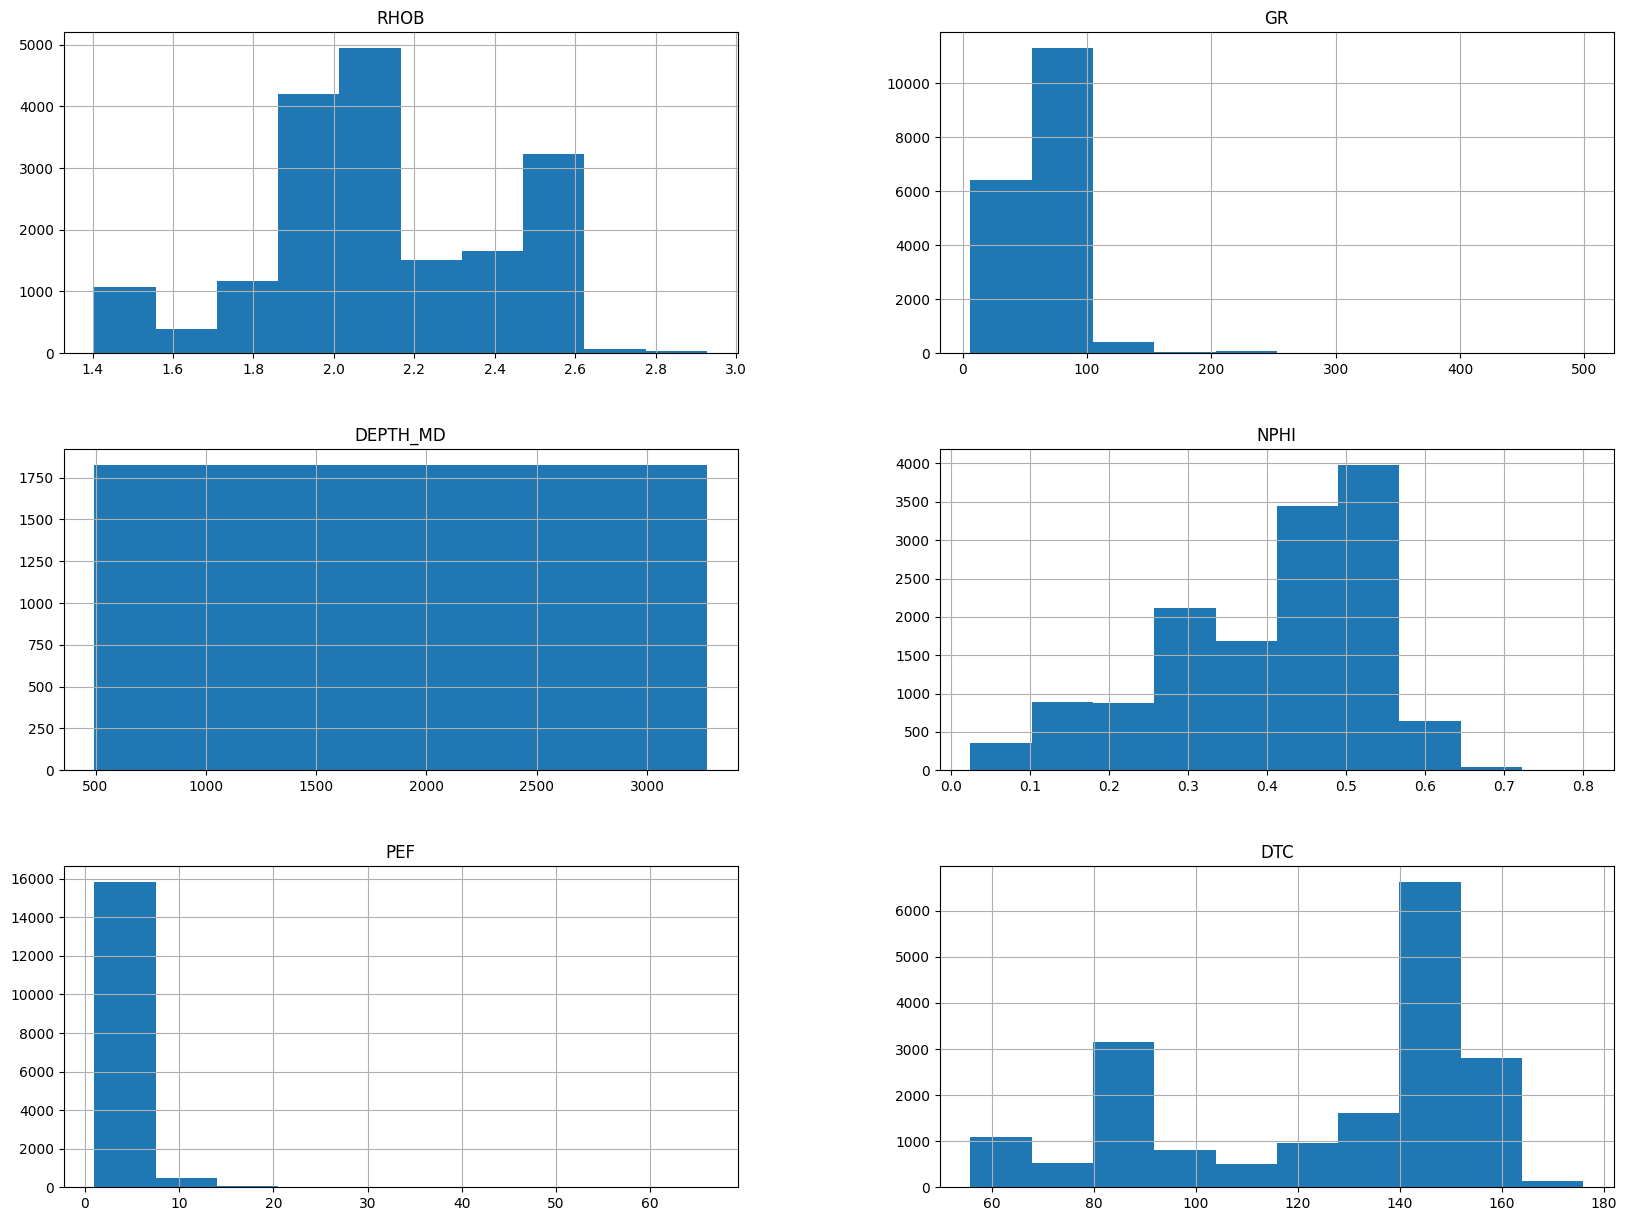

In [16]:
df.hist(figsize=(20,15))
plt.show()

In [17]:
#Since the columns with missingvalues are all skewed we use median to replace those
for col in df[['NPHI','PEF','DTC']]:
       df[col]=df[col].fillna(df[col].median())

In [18]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


Scaling

In [19]:
x=df[['RHOB','NPHI']]

In [20]:
x.head()

,RHOB,NPHI
0,1.884186,0.448527
1,1.889794,0.448527
2,1.896523,0.448527
3,1.891913,0.448527
4,1.880034,0.448527


In [21]:
#doing min max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(x)

In [22]:
#we have to convert this array into dataframe
x=pd.DataFrame(x,columns=['RHOB','NPHI'])
x.head()

,RHOB,NPHI
0,0.314847,0.546693
1,0.318528,0.546693
2,0.322946,0.546693
3,0.319919,0.546693
4,0.312121,0.546693


KMeans Clustering

In [23]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of sqaures
  wcss.append(css)

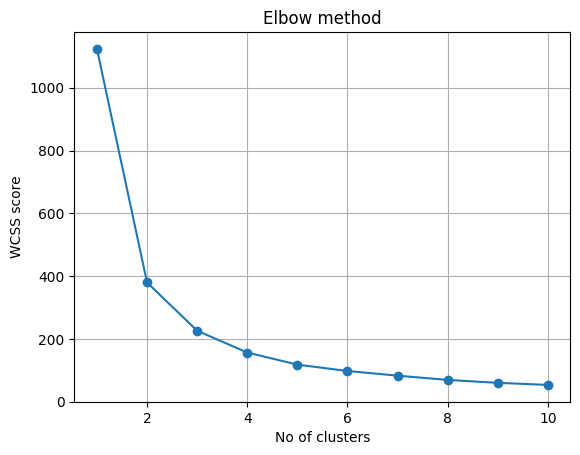

In [24]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.title('Elbow method')
plt.grid()
plt.show()

In [25]:
km=KMeans(n_clusters=4,n_init=10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [26]:
cluster_labels=km.predict(x)

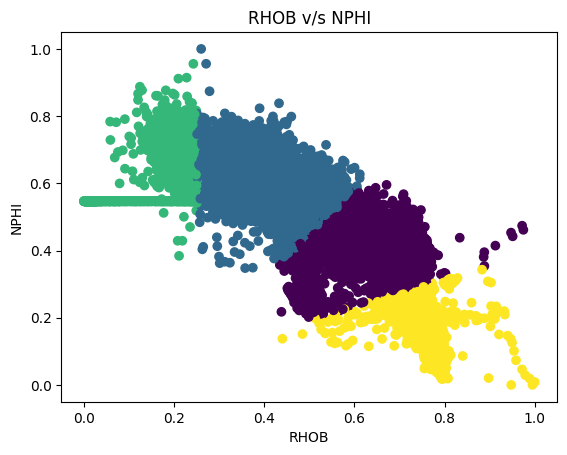

In [27]:
plt.scatter(x['RHOB'],x['NPHI'],c=cluster_labels)
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB v/s NPHI')
plt.show()

In [28]:
cluster_indices=np.where(cluster_labels==0)[0]
cluster_indices

array([ 5372,  5373,  5374, ..., 18190, 18191, 18192])

In [29]:
df['cluster_labels']=cluster_labels

In [30]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,cluster_labels
0,1.884186,80.200851,494.528,0.448527,20.915468,161.131180,1
1,1.889794,79.262886,494.680,0.448527,19.383013,160.603470,1
2,1.896523,74.821999,494.832,0.448527,22.591518,160.173615,1
3,1.891913,72.878922,494.984,0.448527,32.191910,160.149429,1
4,1.880034,71.729141,495.136,0.448527,38.495632,160.128342,1


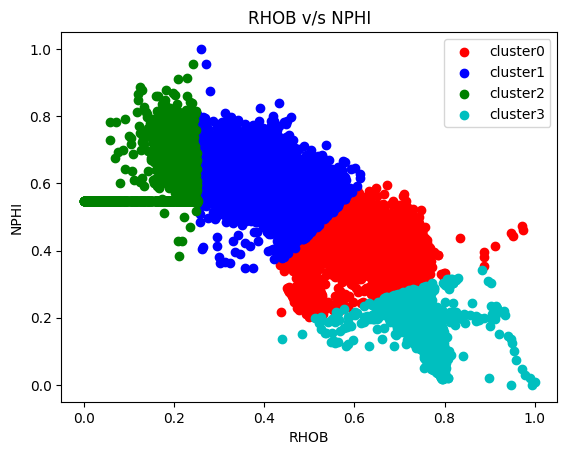

In [31]:
colors=['r','b','g','c']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i],label=f'cluster{i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB v/s NPHI')
plt.legend()
plt.show()

In [32]:
#prediction
def predict_cluster(rhob,nphi):
  new_data=[[rhob,nphi]]
  cluster=km.predict(new_data)
  return cluster[0]

In [33]:
#new data
rhob=56
nphi=78
c=predict_cluster(rhob,nphi)
print(f'This belongs to :{c}')

This belongs to :1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Agglomerative hierarchial clustering

In [34]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [35]:
mergings=linkage(x,method='ward')

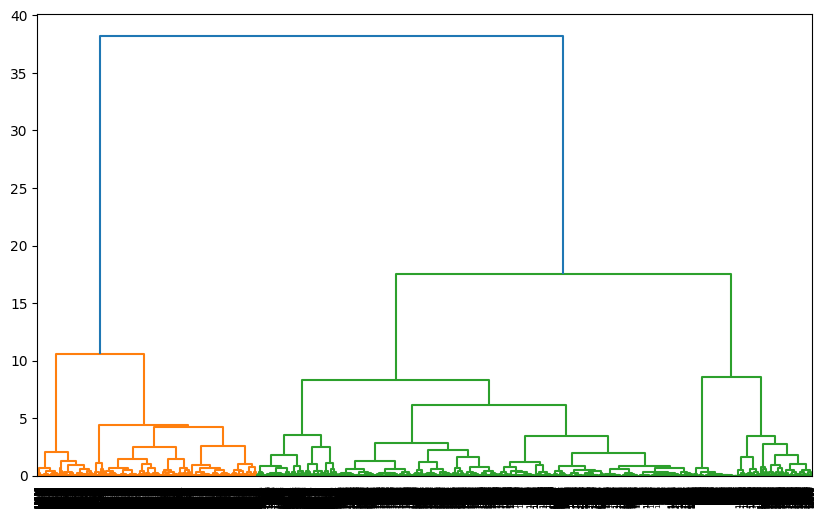

In [36]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [37]:
cluster_label=fcluster(mergings,20,criterion='distance')

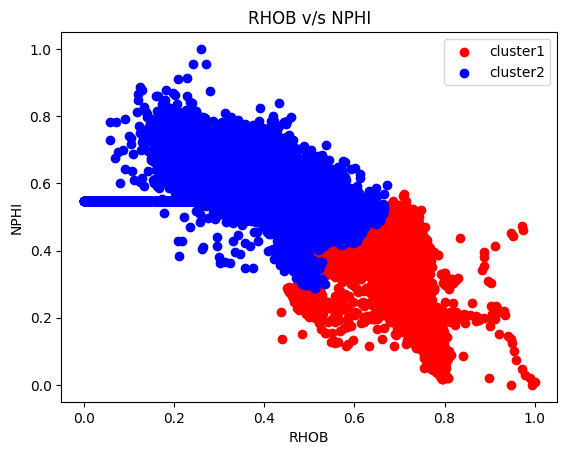

In [38]:
colors=['r','b']
for i in range(1,max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['RHOB'],cluster_data['NPHI'],c=colors[i-1],label=f'cluster{i}')
plt.xlabel('RHOB')
plt.ylabel('NPHI')
plt.title('RHOB v/s NPHI')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(f'KMeans {sil_avg}')

KMeans 0.5663779435855585


In [40]:
silh_avg=silhouette_score(x,cluster_label)
print(f'AH {silh_avg}')

AH 0.6147152734662414


In [41]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [42]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [44]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


kmeans before scaling

In [45]:
x=data[['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

In [46]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x)
  css=km.inertia_#will calculate with in cluster sum of sqaures
  wcss.append(css)

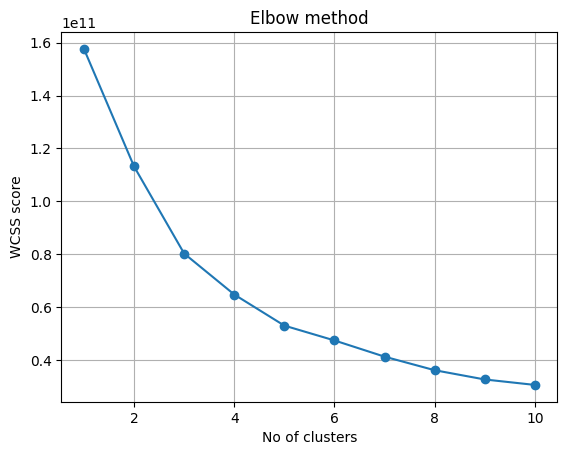

In [47]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.title('Elbow method')
plt.grid()
plt.show()

In [48]:
sil_score=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,n_init=10).fit(x)
  labels = kmeans.labels_
  sil_score.append(silhouette_score(x,labels))

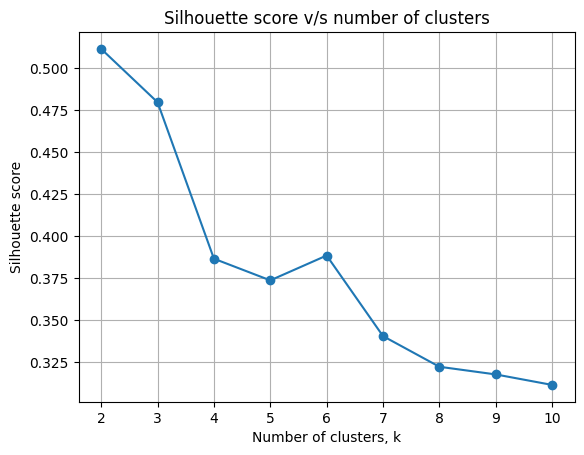

In [49]:
plt.plot(range(2,11), sil_score, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score v/s number of clusters')
plt.grid()
plt.show()

In [50]:
km=KMeans(n_clusters=2,n_init=10)
km.fit(x)

KMeans(n_clusters=2, n_init=10)

In [51]:
cluster_labels=km.predict(x)

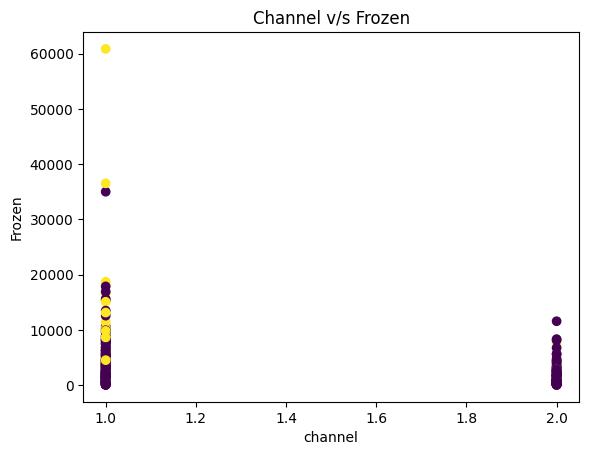

In [52]:
plt.scatter(x['Channel'],x['Frozen'],c=cluster_labels)
plt.xlabel('channel')
plt.ylabel('Frozen')
plt.title('Channel v/s Frozen')
plt.show()

In [53]:
data['cluster_labels']=cluster_labels

In [54]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


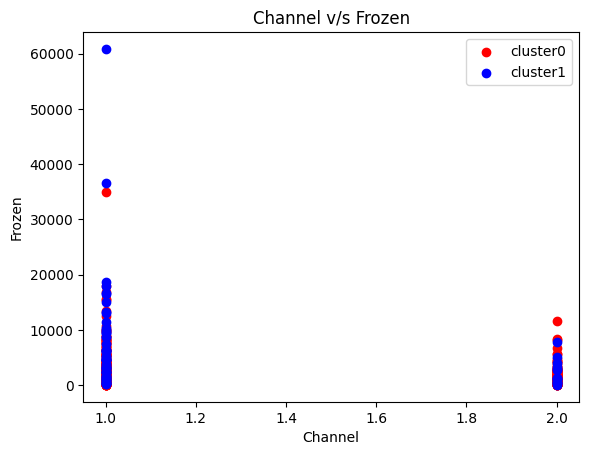

In [55]:
colors=['r','b']
for i in range(max(cluster_labels+1)):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['Channel'],cluster_data['Frozen'],c=colors[i],label=f'cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Frozen')
plt.title('Channel v/s Frozen')
plt.legend()
plt.show()

In [56]:
def predict_cluster(Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen):
    new_data = [[Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]]
    cluster = km.predict(new_data)
    return cluster[0]

# Define the input values
Channel = 2
Region = 3
Fresh = 2345
Milk = 6543
Grocery = 8743
Frozen = 1274
Detergents_Paper = 8470
Delicassen = 2389
c = predict_cluster(Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen)
print(f'Item belongs to cluster: {c}')


Item belongs to cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [57]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x,cluster_labels)
print(f'KMeans {sil_avg}')

KMeans 0.5115333882980367


Agglomerative Hierarchial clustering before scaling

In [58]:
mergings=linkage(x,method='ward')

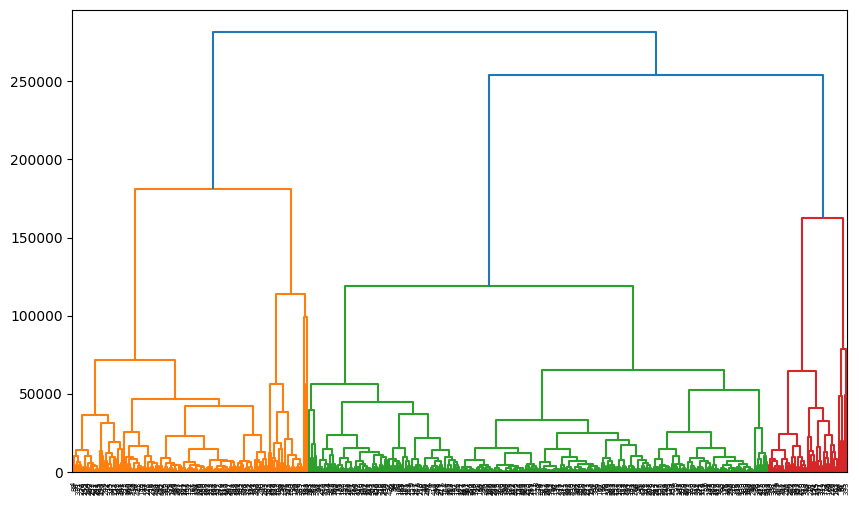

In [59]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [60]:
cluster_label=fcluster(mergings,200000,criterion='distance')

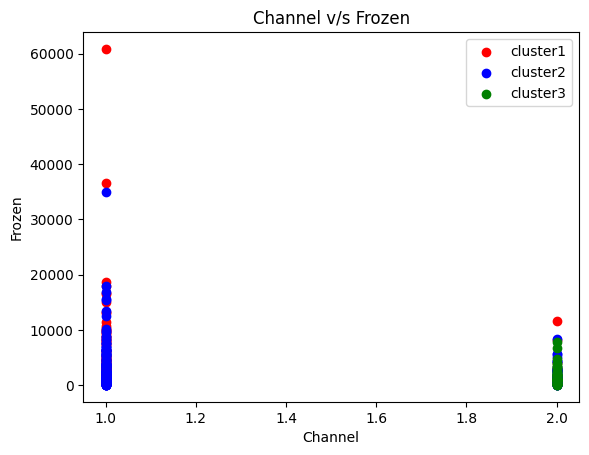

In [61]:
colors=['r','b','g']
for i in range(1,max(cluster_label+1)):
  cluster_data=x[cluster_label==i]
  plt.scatter(cluster_data['Channel'],cluster_data['Frozen'],c=colors[i-1],label=f'cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Frozen')
plt.title('Channel v/s Frozen')
plt.legend()
plt.show()

In [62]:
silh_avg=silhouette_score(x,cluster_label)
print(f'AH {silh_avg}')

AH 0.3750155190004844


Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [64]:
#we have to convert this array into dataframe
x_scaled=pd.DataFrame(x_scaled,columns=['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
x_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


Kmeans after Scaling

In [65]:
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,n_init=10)
  km.fit(x_scaled)
  css=km.inertia_#will calculate with in cluster sum of sqaures
  wcss.append(css)

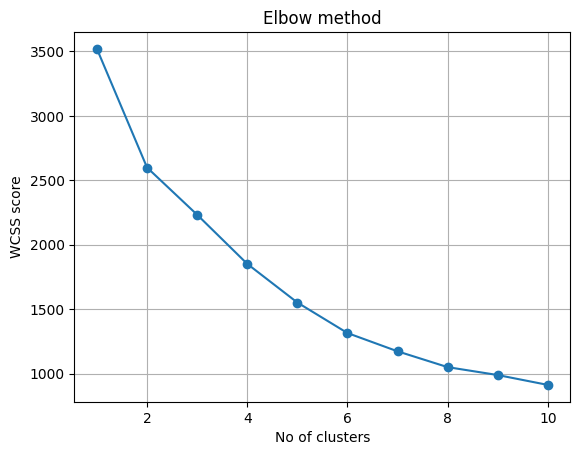

In [66]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.title('Elbow method')
plt.grid()
plt.show()

In [67]:
sil_score=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,n_init=10).fit(x_scaled)
  labels = kmeans.labels_
  sil_score.append(silhouette_score(x_scaled,labels))

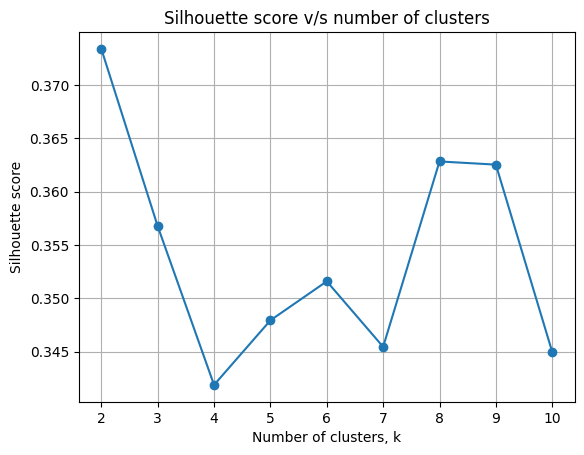

In [68]:
plt.plot(range(2,11), sil_score, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score v/s number of clusters')
plt.grid()
plt.show()

In [69]:
km=KMeans(n_clusters=2,n_init=10)
km.fit(x_scaled)

KMeans(n_clusters=2, n_init=10)

In [70]:
cluster_labels=km.predict(x_scaled)

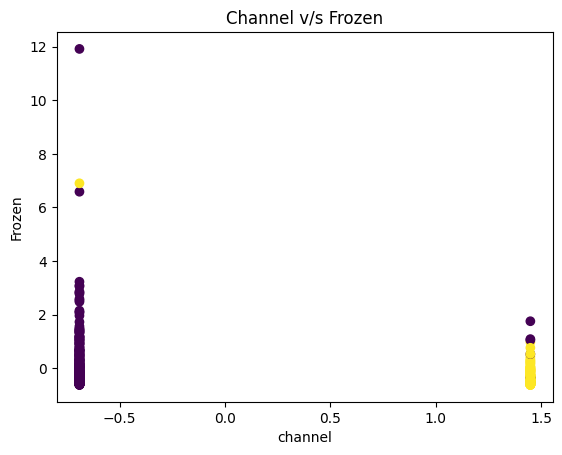

In [71]:
plt.scatter(x_scaled['Channel'],x_scaled['Frozen'],c=cluster_labels)
plt.xlabel('channel')
plt.ylabel('Frozen')
plt.title('Channel v/s Frozen')
plt.show()

In [72]:
data['cluster_labels_scaled']=cluster_labels

In [73]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels,cluster_labels_scaled
0,2,3,12669,9656,7561,214,2674,1338,0,1
1,2,3,7057,9810,9568,1762,3293,1776,0,1
2,2,3,6353,8808,7684,2405,3516,7844,0,1
3,1,3,13265,1196,4221,6404,507,1788,0,0
4,2,3,22615,5410,7198,3915,1777,5185,1,1


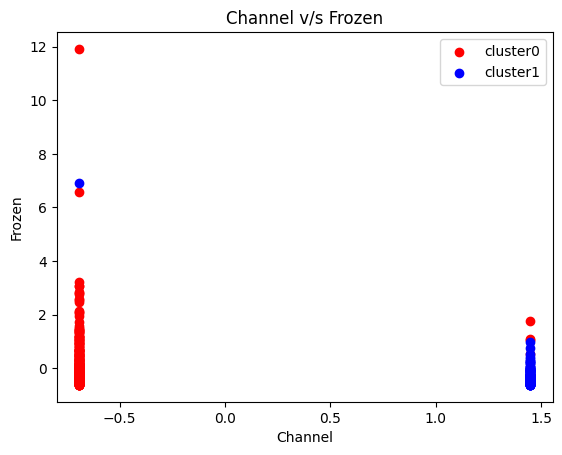

In [74]:
colors=['r','b']
for i in range(max(cluster_labels+1)):
  cluster_data=x_scaled[cluster_labels==i]
  plt.scatter(cluster_data['Channel'],cluster_data['Frozen'],c=colors[i],label=f'cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Frozen')
plt.title('Channel v/s Frozen')
plt.legend()
plt.show()

In [75]:
def predict_cluster(Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen):
    new_data = [[Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]]
    cluster = km.predict(new_data)
    return cluster[0]

# Define the input values
Channel = 2
Region = 3
Fresh = 2345
Milk = 6543
Grocery = 8743
Frozen = 1274
Detergents_Paper = 8470
Delicassen = 2389
c = predict_cluster(Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen)
print(f'Item belongs to cluster: {c}')

Item belongs to cluster: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [76]:
from sklearn.metrics import silhouette_score
sil_avg=silhouette_score(x_scaled,cluster_labels)
print(f'KMeans {sil_avg}')

KMeans 0.37323636511581165


Agglomerative Hierarchial after Scaling

In [77]:
mergings=linkage(x_scaled,method='ward')

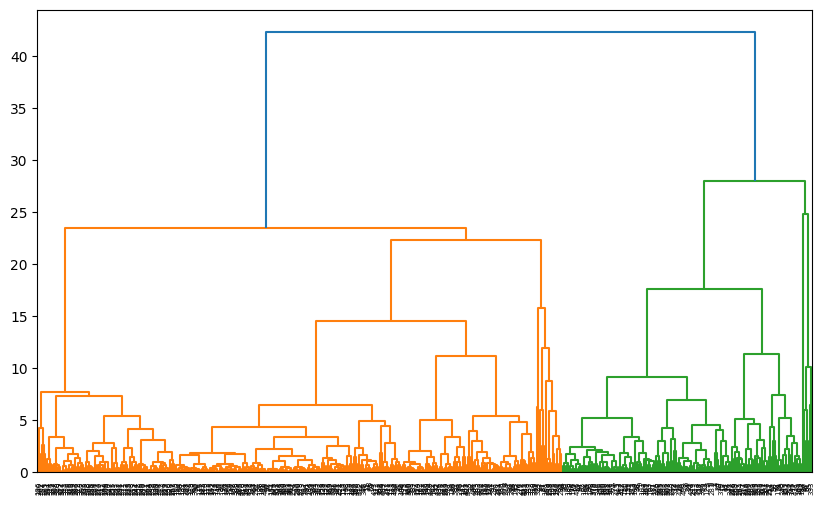

In [78]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.show()

In [79]:
cluster_label=fcluster(mergings,30,criterion='distance')

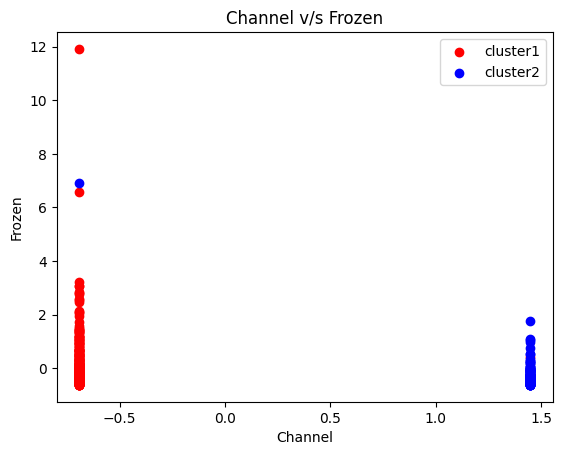

In [80]:
colors=['r','b',]
for i in range(1,max(cluster_label+1)):
  cluster_data=x_scaled[cluster_label==i]
  plt.scatter(cluster_data['Channel'],cluster_data['Frozen'],c=colors[i-1],label=f'cluster{i}')
plt.xlabel('Channel')
plt.ylabel('Frozen')
plt.title('Channel v/s Frozen')
plt.legend()
plt.show()

In [81]:
silh_avg=silhouette_score(x_scaled,cluster_label)
print(f'AH {silh_avg}')

AH 0.3680209405194812


In [82]:
#A general rule of thumb is that a silhouette score above 0.5 indicates a good clustering
#A silhouette score below 0.25 indicates a bad clustering, and a silhouette score between 0.25 and 0.5 indicates a fair clustering.
#By observing the silhouette score , the model is good before scaling